In [ ]:
from google.colab import files
uploaded = files.upload()

Saving synthetic_medical_data.csv to synthetic_medical_data (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv("synthetic_medical_data.csv")  # datamız
df.head()

,Age,Age_in_Diagnosis,Gender,Follow_Up_Duration_Month,Disease_Duration_Month,Preop_Tm_Size_MAX_mm,Kav_INV,Preop_GH,Sparse_GR,Preop_Hypopituitarism_Binary,...,Preop_INV,Last_Treatment_DOST,Macro_Micro,Comb_therapy,Last_IGF1,Tiroid_ca,Kolon_ca,MALIGNANCY_OTHER_COMBINED,Pituitary_Adenoma,Dead
0,60.457284,26.064144,0,21.069885,168.840051,17.698645,0.0,20.801887,0,YOK,...,1.0,0.0,NaN,0,516.992255,0,0,NO_MALIGNANCY,Macroadenoma,0
1,52.202564,19.655357,0,67.278860,56.909049,30.303121,0.0,18.759584,0,YOK,...,1.0,1.0,Microadenoma,0,247.924293,0,0,NO_MALIGNANCY,Macroadenoma,0
2,62.419951,58.952532,1,58.583124,245.786261,4.745002,NaN,15.470987,0,NaN,...,1.0,0.0,NaN,0,232.651155,0,0,NO_MALIGNANCY,Macroadenoma,0
3,73.799388,48.852388,0,127.389974,121.230738,8.670370,0.0,1.458926,0,YOK,...,1.0,0.0,NaN,1,347.418438,0,0,NO_MALIGNANCY,Macroadenoma,1
4,50.956006,40.332984,1,16.886720,90.890337,15.551001,0.0,11.106907,0,YOK,...,1.0,0.0,Macroadenoma,1,20.000000,1,0,THYROID,Macroadenoma,0


In [ ]:
#null değer içeren kolon oranı
missing = (df.isnull().mean() * 100).round(2).sort_values(ascending=False)
missing.head(15)

,0
Preop_GH,30.81
Kav_INV,22.24
Preop_INV,21.09
Preop_Tm_Size_MAX_mm,20.10
Pituitary_Adenoma,19.44
Age_at_Operation,18.62
Macro_Micro,17.96
Preop_Hypopituitarism_Binary,13.18
Preop_Hypopituitarism_Detalied,13.18
Last_Upper_Limit_of_Normal,12.03


In [ ]:
# Kaç satır, kaç sütun?
df.shape


(607, 52)

In [ ]:
# Sütun tipleri
df.dtypes.value_counts()

,count
int64,25
float64,15
object,12


In [ ]:
df["Dead"].value_counts()
df["Dead"].value_counts(normalize=True)

,proportion
Dead,
0,0.91598
1,0.08402


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Target & Features ayır
target = "Dead"
X = df.drop(columns=[target])
y = df[target]

# Train-test split (stratified önemli, çünkü veri dengesiz)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

X_train.shape, X_test.shape, y_train.value_counts(), y_test.value_counts()


((485, 51),
 (122, 51),
 Dead
 0    444
 1     41
 Name: count, dtype: int64,
 Dead
 0    112
 1     10
 Name: count, dtype: int64)

In [ ]:
# Sayısal sütunlar
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Kategorik sütunlar
categorical_features = X_train.select_dtypes(include=["object"]).columns.tolist()

numeric_features, len(numeric_features), categorical_features, len(categorical_features)


(['Age',
  'Age_in_Diagnosis',
  'Gender',
  'Follow_Up_Duration_Month',
  'Disease_Duration_Month',
  'Preop_Tm_Size_MAX_mm',
  'Kav_INV',
  'Preop_GH',
  'Sparse_GR',
  'Last_GH',
  'Last_Upper_Limit_of_Normal',
  'RT',
  'Colon_polyp',
  'GIS_cancer',
  'Lung_cancer',
  'Hematologic_cancer',
  'Breast_ca',
  'Urogenital_cancer',
  'ANY_MALIGNANCY',
  'DM',
  'HT',
  'OSAS',
  'Dislipidemi',
  'Congestive_Heart_Failure',
  'Coronary_Artery_Disease',
  'Cerebrovascular_Accident',
  'Cardiovascular_Disease',
  'Postop_SLAR_Usage',
  'Postop_Dost_Usage',
  'Pegvisomant_Usage',
  'Repeat_TSS',
  'Age_at_Operation',
  'Number_of_Operations',
  'Preop_INV',
  'Last_Treatment_DOST',
  'Comb_therapy',
  'Last_IGF1',
  'Tiroid_ca',
  'Kolon_ca'],
 39,
 ['Preop_Hypopituitarism_Binary',
  'Preop_Hypopituitarism_Detalied',
  'Postop_Hypopituitarism_Binary',
  'Postop_Hypopituitarism_Detailed',
  'Remission_3_Month',
  'Preop_Medication_Usage',
  'Last_Status',
  'SLAR_resistance',
  'TSS_VAR_YOK

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [ ]:
numeric_features = [
    'Age', 'Age_in_Diagnosis', 'Gender', 'Follow_Up_Duration_Month',
    'Disease_Duration_Month', 'Preop_Tm_Size_MAX_mm', 'Kav_INV', 'Preop_GH',
    'Sparse_GR', 'Last_GH', 'Last_Upper_Limit_of_Normal', 'RT', 'Colon_polyp',
    'GIS_cancer', 'Lung_cancer', 'Hematologic_cancer', 'Breast_ca',
    'Urogenital_cancer', 'ANY_MALIGNANCY', 'DM', 'HT', 'OSAS', 'Dislipidemi',
    'Congestive_Heart_Failure', 'Coronary_Artery_Disease',
    'Cerebrovascular_Accident', 'Cardiovascular_Disease', 'Postop_SLAR_Usage',
    'Postop_Dost_Usage', 'Pegvisomant_Usage', 'Repeat_TSS',
    'Age_at_Operation', 'Number_of_Operations', 'Preop_INV',
    'Last_Treatment_DOST', 'Comb_therapy', 'Last_IGF1', 'Tiroid_ca', 'Kolon_ca'
]

categorical_features = [
    'Preop_Hypopituitarism_Binary', 'Preop_Hypopituitarism_Detalied',
    'Postop_Hypopituitarism_Binary', 'Postop_Hypopituitarism_Detailed',
    'Remission_3_Month', 'Preop_Medication_Usage', 'Last_Status',
    'SLAR_resistance', 'TSS_VAR_YOK', 'Macro_Micro',
    'MALIGNANCY_OTHER_COMBINED', 'Pituitary_Adenoma'
]


In [ ]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),      # Eksik değer → median
    ("scaler", StandardScaler())                         # Standardizasyon
])


In [ ]:
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),    # Eksik kategori → en sık olan
    ("onehot", OneHotEncoder(handle_unknown="ignore"))       # Bütün kategorileri kodla
])


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [ ]:
#kendimiz görelim diye kodda yok.
# Preprocessing pipeline'ı train set üzerinde çalıştırıyoruz
X_train_processed = preprocessor.fit_transform(X_train)

# Ortaya çıkan array'in boyutuna bakalım
X_train_processed.shape


(485, 80)

In [ ]:
#kendimiz görelim diye kodda yok.

import pandas as pd

# OneHot için yeni sütun isimlerini alma
ohe = preprocessor.named_transformers_["cat"].named_steps["onehot"]
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

# Sayısal + kategorik final sütun isimlerini birleştirme
final_columns = numeric_features + list(ohe_feature_names)

# !!!! DİKKAT: toarray() YOK !!!!
X_train_clean_df = pd.DataFrame(X_train_processed, columns=final_columns)

X_train_clean_df.head()


,Age,Age_in_Diagnosis,Gender,Follow_Up_Duration_Month,Disease_Duration_Month,Preop_Tm_Size_MAX_mm,Kav_INV,Preop_GH,Sparse_GR,Last_GH,...,Macro_Micro_Microadenoma,MALIGNANCY_OTHER_COMBINED_BREAST_CA,MALIGNANCY_OTHER_COMBINED_GIS,MALIGNANCY_OTHER_COMBINED_HEMATOLOGIC,MALIGNANCY_OTHER_COMBINED_LUNG,MALIGNANCY_OTHER_COMBINED_NO_MALIGNANCY,MALIGNANCY_OTHER_COMBINED_THYROID,MALIGNANCY_OTHER_COMBINED_UROGENITAL,Pituitary_Adenoma_Macroadenoma,Pituitary_Adenoma_Microadenoma
0,0.794051,-0.772786,-0.841277,-0.109824,-0.948307,-0.192651,-0.775023,-0.138882,-0.470810,-0.736086,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.640773,-1.240113,1.188670,-0.054913,-0.954097,-0.323181,-0.775023,0.084828,2.123997,-0.485825,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-1.409494,0.515958,1.188670,0.993117,-1.066936,-0.192651,1.290285,-0.168853,2.123997,-0.882337,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-1.434893,-0.186087,1.188670,-0.205281,-0.211713,-0.846429,1.290285,-0.924540,-0.470810,-1.031798,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.726786,-0.374737,1.188670,1.289834,0.425370,-1.415650,1.290285,-0.287380,-0.470810,-0.814531,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
##kendimiz görelim diye kodda yok.

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

log_reg_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
])


In [ ]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Logistic Regression Pipeline
log_reg_model = Pipeline(steps=[

    # 1) Preprocessing aşaması
    ("preprocess", preprocessor),

    # 2) Model aşaması
    ("model", LogisticRegression(
        max_iter=1000,           # Modelin daha uzun öğrenmesini sağlar
        class_weight="balanced", # İmbalanced dataset için performansı artırır
        solver="lbfgs",          # Küçük–orta boy datalar için stabil çözücü
        random_state=42
    ))
])

log_reg_model.fit(X_train, y_train)

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, average_precision_score, confusion_matrix
)

# Tahminler
y_pred = log_reg_model.predict(X_test)
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("PR-AUC:", average_precision_score(y_test, y_pred_proba))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))




Accuracy: 0.6557377049180327
Precision: 0.029411764705882353
Recall: 0.1
F1: 0.045454545454545456
ROC-AUC: 0.41875000000000007
PR-AUC: 0.0737054171487799

Confusion Matrix:
 [[79 33]
 [ 9  1]]


In [ ]:
#LOGISTIC REGRESSION with Threshhold Tuning
import numpy as np

thresholds = np.arange(0.05, 0.95, 0.05)

for t in thresholds:
    preds = (y_pred_proba >= t).astype(int)
    print(f"Threshold {t:.2f} → Recall: {recall_score(y_test, preds):.3f}, Precision: {precision_score(y_test, preds):.3f}, F1: {f1_score(y_test, preds):.3f}")


Threshold 0.05 → Recall: 0.600, Precision: 0.067, F1: 0.121
Threshold 0.10 → Recall: 0.600, Precision: 0.080, F1: 0.141
Threshold 0.15 → Recall: 0.500, Precision: 0.077, F1: 0.133
Threshold 0.20 → Recall: 0.400, Precision: 0.074, F1: 0.125
Threshold 0.25 → Recall: 0.300, Precision: 0.059, F1: 0.098
Threshold 0.30 → Recall: 0.300, Precision: 0.061, F1: 0.102
Threshold 0.35 → Recall: 0.300, Precision: 0.068, F1: 0.111
Threshold 0.40 → Recall: 0.200, Precision: 0.051, F1: 0.082
Threshold 0.45 → Recall: 0.200, Precision: 0.054, F1: 0.085
Threshold 0.50 → Recall: 0.100, Precision: 0.029, F1: 0.045
Threshold 0.55 → Recall: 0.100, Precision: 0.032, F1: 0.049
Threshold 0.60 → Recall: 0.100, Precision: 0.037, F1: 0.054
Threshold 0.65 → Recall: 0.100, Precision: 0.042, F1: 0.059
Threshold 0.70 → Recall: 0.100, Precision: 0.043, F1: 0.061
Threshold 0.75 → Recall: 0.000, Precision: 0.000, F1: 0.000
Threshold 0.80 → Recall: 0.000, Precision: 0.000, F1: 0.000
Threshold 0.85 → Recall: 0.000, Precisio

In [ ]:
#RANDOM FOREST


from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

rf_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=300,      # Ağaç sayısı (100 yerine 300 daha stabil)
        max_depth=None,        # Ağaçlar derinleşebilsin
        min_samples_split=10,  # Overfitting azaltır
        min_samples_leaf=5,    # Küçük grupları engeller
        class_weight="balanced",  # Imbalanced veriye özel
        random_state=42,
        n_jobs=-1               # Daha hızlı çalışır
    ))
])

#Modeli eğitelim
rf_model.fit(X_train, y_train)


#Test seti üzerinde tahminleri alalım
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

#Performans metriklerini alalım

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, average_precision_score,
    confusion_matrix
)

print("=== RANDOM FOREST RESULTS ===\n")

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_rf))
print("PR-AUC:", average_precision_score(y_test, y_pred_proba_rf))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



=== RANDOM FOREST RESULTS ===

Accuracy: 0.9180327868852459
Precision: 0.0
Recall: 0.0
F1: 0.0
ROC-AUC: 0.5044642857142858
PR-AUC: 0.09947901934360118

Confusion Matrix:
 [[112   0]
 [ 10   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# RANDOM FOREST + Threshhold . Threshold nerede ilk Precisionını veriyor

import numpy as np
from sklearn.metrics import recall_score, precision_score, f1_score

thresholds = np.arange(0.01, 0.5, 0.05)

for t in thresholds:
    preds = (y_pred_proba_rf >= t).astype(int)
    print(f"Threshold {t:.2f} → Recall: {recall_score(y_test, preds):.3f}, "
          f"Precision: {precision_score(y_test, preds, zero_division=0):.3f}, "
          f"F1: {f1_score(y_test, preds, zero_division=0):.3f}")


Threshold 0.01 → Recall: 1.000, Precision: 0.082, F1: 0.152
Threshold 0.06 → Recall: 1.000, Precision: 0.083, F1: 0.153
Threshold 0.11 → Recall: 0.900, Precision: 0.078, F1: 0.144
Threshold 0.16 → Recall: 0.900, Precision: 0.089, F1: 0.162
Threshold 0.21 → Recall: 0.600, Precision: 0.100, F1: 0.171
Threshold 0.26 → Recall: 0.200, Precision: 0.059, F1: 0.091
Threshold 0.31 → Recall: 0.100, Precision: 0.077, F1: 0.087
Threshold 0.36 → Recall: 0.100, Precision: 0.167, F1: 0.125
Threshold 0.41 → Recall: 0.000, Precision: 0.000, F1: 0.000
Threshold 0.46 → Recall: 0.000, Precision: 0.000, F1: 0.000


In [ ]:
#en iyi thresholdu 0.21 de gördük ve şimdide 0.21 için sonuçları alıyoruz

best_threshold = 0.21
y_pred_rf_best = (y_pred_proba_rf >= best_threshold).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("Precision:", precision_score(y_test, y_pred_rf_best, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_rf_best))
print("F1:", f1_score(y_test, y_pred_rf_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_best))


Accuracy: 0.5245901639344263
Precision: 0.1
Recall: 0.6
F1: 0.17142857142857143

Confusion Matrix:
 [[58 54]
 [ 4  6]]


====== RANDOM FOREST FINAL RESULTS (Threshold = 0.21) ======

Accuracy: 0.5245901639344263
Precision: 0.1
Recall: 0.6
F1-Score: 0.17142857142857143

ROC-AUC: 0.5044642857142858
PR-AUC: 0.09947901934360118
MCC (Matthews Correlation Coefficient): 0.0646685986377437

===== CLASSIFICATION REPORT =====
              precision    recall  f1-score   support

           0       0.94      0.52      0.67       112
           1       0.10      0.60      0.17        10

    accuracy                           0.52       122
   macro avg       0.52      0.56      0.42       122
weighted avg       0.87      0.52      0.63       122

Confusion Matrix:
 [[58 54]
 [ 4  6]]


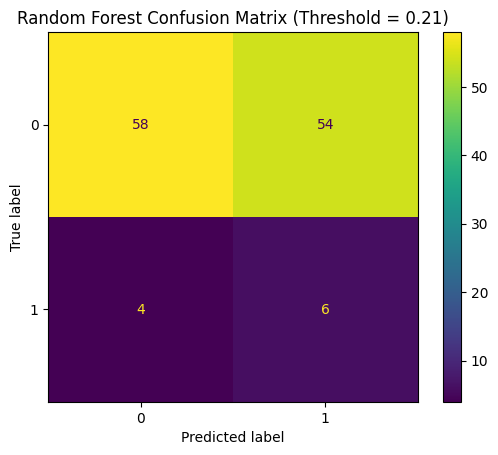

In [ ]:
#RANDOMFOREST + THRESHHOLD TUM METRICLERIN OLDUGU HALI
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    classification_report,
    matthews_corrcoef,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# Seçtiğimiz en iyi threshold
best_threshold = 0.21

# Yeni tahminler (threshold uygulanmış)
y_pred_rf_best = (y_pred_proba_rf >= best_threshold).astype(int)

print("====== RANDOM FOREST FINAL RESULTS (Threshold = 0.21) ======\n")

# Temel Metrikler
print("Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("Precision:", precision_score(y_test, y_pred_rf_best, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_rf_best))
print("F1-Score:", f1_score(y_test, y_pred_rf_best))

# ROC ve PR AUC (threshold'tan bağımsız)
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)
pr_auc = average_precision_score(y_test, y_pred_proba_rf)
print("\nROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

# MCC
mcc = matthews_corrcoef(y_test, y_pred_rf_best)
print("MCC (Matthews Correlation Coefficient):", mcc)

# Classification Report
print("\n===== CLASSIFICATION REPORT =====")
print(classification_report(y_test, y_pred_rf_best))

# Confusion Matrix - Sayısal
cm = confusion_matrix(y_test, y_pred_rf_best)
print("Confusion Matrix:\n", cm)

# Confusion Matrix - Görsel
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Random Forest Confusion Matrix (Threshold = 0.21)")
plt.show()

# Eğer istersen kaydetmek için:
# plt.savefig("rf_confusion_matrix.png")


In [ ]:
#RANDOM FOREST + SMOTE başlıyor.
from collections import Counter
print("Before SMOTE:", Counter(y_train))

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

smote_rf_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),   # senin kurduğun yapı
    ("smote", SMOTE(random_state=42)),
    ("model", RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1
    ))
])

smote_rf_pipeline.fit(X_train, y_train)


Before SMOTE: Counter({0: 444, 1: 41})


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Age_in_Diagnosis',
                                                   'Gender',
                                                   'Follow_Up_Duration_Month',
                                                   'Disease_Duration_Month',
                                                   'Preop_Tm_Size_MAX_mm',
                                                   'Kav_INV', 'Preop_GH',
                                                   'Sparse_GR', 'Last_GH',
                                                   'Last_Upper_Limit_of_Normal',
                                                   'RT', 'Co...
                                                   'Postop_Hypopituitarism_Binary',
                                                   'Postop_Hypopituitarism_Detailed',
                                                   'Remission_3_Month',
                                                   'Preop_Medication_Usage',
                                                   'Last_Status',
                                                   'SLAR_resistance',
                                                   'TSS_VAR_YOK', 'Macro_Micro',
                                                   'MALIGNANCY_OTHER_COMBINED',
                                                   'Pituitary_Adenoma'])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(min_samples_leaf=5,
                                        min_samples_split=10, n_estimators=300,
                                        n_jobs=-1, random_state=42))])

In [ ]:
# RANDOM FOREST'da SMOTE'dan sonra (aşağıdaki koddan sonra yani)444 e 444 yaşayan ve ölü saple oldu. 403 tane ekledi.
from collections import Counter

# SMOTE sonrası y_train dağılımını çekiyoruz
y_smote = smote_rf_pipeline.named_steps["smote"].fit_resample(
    preprocessor.fit_transform(X_train), y_train
)[1]

print("After SMOTE:", Counter(y_smote))
print("Synthetic samples added:", Counter(y_smote)[1] - Counter(y_train)[1])


After SMOTE: Counter({0: 444, 1: 444})
Synthetic samples added: 403


In [ ]:
#en iyi threshhold değişcek şimdi çünkü train set değişti
y_pred_smote = smote_rf_pipeline.predict(X_test)
y_pred_proba_smote = smote_rf_pipeline.predict_proba(X_test)[:,1]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Precision:", precision_score(y_test, y_pred_smote))
print("Recall:", recall_score(y_test, y_pred_smote))
print("F1:", f1_score(y_test, y_pred_smote))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_smote))
print("PR-AUC:", average_precision_score(y_test, y_pred_proba_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))


Accuracy: 0.9180327868852459
Precision: 0.0
Recall: 0.0
F1: 0.0
ROC-AUC: 0.5249999999999999
PR-AUC: 0.09382334031350867

Confusion Matrix:
 [[112   0]
 [ 10   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:

#“Model ayırt etme gücü sınırlı olsa da (roc-auc=0.52), uygun threshold seçimi ile klinik açıdan anlamlı hale getirilmiştir.threshold=0.21 için iyi”
# smote olunca  73-39, 5-5. smotesuz 0.21 threshhold için 58-54,4-6 idi. yani performansı arttırdı.
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    matthews_corrcoef, confusion_matrix
)

thresholds = np.arange(0.01, 0.51, 0.05)

print("THRESH\tACC\tPREC\tRECL\tF1\tROC-AUC\tPR-AUC\tMCC\tCM")
for t in thresholds:
    preds = (y_pred_proba_smote >= t).astype(int)

    acc  = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, zero_division=0)
    rec  = recall_score(y_test, preds)
    f1   = f1_score(y_test, preds, zero_division=0)

    roc  = roc_auc_score(y_test, y_pred_proba_smote)      # threshold'tan bağımsız
    pr   = average_precision_score(y_test, y_pred_proba_smote)  # threshold'tan bağımsız
    mcc  = matthews_corrcoef(y_test, preds)

    cm = confusion_matrix(y_test, preds)

    print(f"{t:0.2f}\t{acc:0.3f}\t{prec:0.3f}\t{rec:0.3f}\t{f1:0.3f}\t"
          f"{roc:0.3f}\t{pr:0.3f}\t{mcc:0.3f}\t{cm.tolist()}")


THRESH	ACC	PREC	RECL	F1	ROC-AUC	PR-AUC	MCC	CM
0.01	0.082	0.082	1.000	0.152	0.525	0.094	0.000	[[0, 112], [0, 10]]
0.06	0.123	0.085	1.000	0.157	0.525	0.094	0.062	[[5, 107], [0, 10]]
0.11	0.221	0.087	0.900	0.159	0.525	0.094	0.046	[[18, 94], [1, 9]]
0.16	0.393	0.079	0.600	0.140	0.525	0.094	-0.014	[[42, 70], [4, 6]]
0.21	0.639	0.114	0.500	0.185	0.525	0.094	0.087	[[73, 39], [5, 5]]
0.26	0.738	0.077	0.200	0.111	0.525	0.094	-0.010	[[88, 24], [8, 2]]
0.31	0.820	0.000	0.000	0.000	0.525	0.094	-0.099	[[100, 12], [10, 0]]
0.36	0.869	0.000	0.000	0.000	0.525	0.094	-0.068	[[106, 6], [10, 0]]
0.41	0.902	0.000	0.000	0.000	0.525	0.094	-0.039	[[110, 2], [10, 0]]
0.46	0.910	0.000	0.000	0.000	0.525	0.094	-0.027	[[111, 1], [10, 0]]


In [ ]:
#-----------------Model Tunning-------------
from scipy.stats import randint as sp_randint

# Random Forest için denenecek hiperparametre aralıkları
param_dist = {
    'model__n_estimators': sp_randint(100, 500),  # Ağaç sayısı
    'model__max_depth': [None, 5, 10, 20],      # Maksimum derinlik
    'model__min_samples_split': sp_randint(2, 20), # Düğüm bölmek için min. örnek
    'model__min_samples_leaf': sp_randint(1, 10), # Yaprak düğümde min. örnek
    'model__criterion': ['gini', 'entropy']
}

In [ ]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from imblearn.pipeline import Pipeline as ImbPipeline
import numpy as np

# 1. Pipeline'ı (SMOTE dahil) tanımlama
# imblearn'in Pipeline'ını kullanıyoruz (ImbPipeline) çünkü SMOTE bir sampling (örnekleme) adımıdır.
smote_rf_opt_pipeline = ImbPipeline(steps=[
    ("preprocess", preprocessor), # Veri ön işleme adımı (varsayalım tanımlı)
    ("smote", SMOTE(random_state=42)),
    ("model", RandomForestClassifier(random_state=42, n_jobs=-1)) # Hiperparametreleri RSCV bulacak
])

# 2. Dış ve İç Çapraz Doğrulama Ayarları
# Sınıf dengesini korumak için Stratified kullanıyoruz.
N_SPLITS = 5
dış_cv = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
iç_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) # RSCV için daha hızlı bir iç CV

# 3. Sonuçları depolamak için boş listeler
test_recall_scores = []
test_precision_scores = []
test_f1_scores = []
best_params_list = []


In [ ]:
# 4. Dış Döngü Başlıyor (Model Değerlendirme)
print(f"--- Nested Cross-Validation ({N_SPLITS}-Fold Dış Döngü) Başlıyor ---")
print("Her döngüde RSCV, eğitim verisini dengeleyip en iyi hiperparametreleri bulacaktır.")

for i, (train_index, test_index) in enumerate(dış_cv.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # RSCV Nesnesi (İç Döngü)
    random_search = RandomizedSearchCV(
        estimator=smote_rf_opt_pipeline,
        param_distributions=param_dist,
        n_iter=50, # Denenecek rastgele kombinasyon sayısı (Zaman kısıtına göre ayarlayın)
        scoring='recall', # Azınlık sınıfı için Recall'u optimize et
        cv=iç_cv,
        verbose=0,
        random_state=42,
        n_jobs=-1,
        refit=True # En iyi modeli otomatik eğitir
    )
     # 5. RSCV Çalıştırma
    # smote_rf_opt_pipeline.fit() metodu, SMOTE'u sadece X_train içinde çalıştırır!
    random_search.fit(X_train, y_train)

    # 6. Dış Test Seti Üzerinde Değerlendirme (Gerçek Performans)
    best_pipeline = random_search.best_estimator_
    y_pred = best_pipeline.predict(X_test)

    # Metrikleri hesaplama ve kaydetme
    test_recall_scores.append(recall_score(y_test, y_pred, zero_division=0))
    test_precision_scores.append(precision_score(y_test, y_pred, zero_division=0))
    test_f1_scores.append(f1_score(y_test, y_pred, zero_division=0))
    best_params_list.append(random_search.best_params_)

    print(f"Fold {i+1} - En İyi Parametreler: {random_search.best_params_}")
    print(f"Fold {i+1} - Test Recall: {test_recall_scores[-1]:.4f}")

--- Nested Cross-Validation (5-Fold Dış Döngü) Başlıyor ---
Her döngüde RSCV, eğitim verisini dengeleyip en iyi hiperparametreleri bulacaktır.
Fold 1 - En İyi Parametreler: {'model__criterion': 'gini', 'model__max_depth': 20, 'model__min_samples_leaf': 8, 'model__min_samples_split': 8, 'model__n_estimators': 221}
Fold 1 - Test Recall: 0.0000
Fold 2 - En İyi Parametreler: {'model__criterion': 'gini', 'model__max_depth': 20, 'model__min_samples_leaf': 8, 'model__min_samples_split': 8, 'model__n_estimators': 221}
Fold 2 - Test Recall: 0.0000
Fold 3 - En İyi Parametreler: {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 1, 'model__min_samples_split': 13, 'model__n_estimators': 394}
Fold 3 - Test Recall: 0.1000
Fold 4 - En İyi Parametreler: {'model__criterion': 'gini', 'model__max_depth': 20, 'model__min_samples_leaf': 8, 'model__min_samples_split': 8, 'model__n_estimators': 221}
Fold 4 - Test Recall: 0.0000
Fold 5 - En İyi Parametreler: {'model__criterion': 'g

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    matthews_corrcoef, confusion_matrix
)
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


# 1. RSCV SONUCU BELİRLENEN EN İYİ HİPERPARAMETRELER
FINAL_BEST_PARAMS = {
    'model__criterion': 'gini',
    'model__max_depth': 20,
    'model__min_samples_leaf': 8,
    'model__min_samples_split': 8,
    'model__n_estimators': 221
}

# 2. FINAL PIPELINE'I OLUŞTURMA
# RSCV tarafından belirlenen parametreleri modele doğrudan iletiyoruz.
final_pipeline = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("model", RandomForestClassifier(
        random_state=42,
        n_jobs=-1,
        criterion=FINAL_BEST_PARAMS['model__criterion'],
        max_depth=FINAL_BEST_PARAMS['model__max_depth'],
        min_samples_leaf=FINAL_BEST_PARAMS['model__min_samples_leaf'],
        min_samples_split=FINAL_BEST_PARAMS['model__min_samples_split'],
        n_estimators=FINAL_BEST_PARAMS['model__n_estimators']
    ))
])

# 3. TÜM EĞİTİM VERİSİ ÜZERİNDE EĞİTİM
print("Final Pipeline, tüm eğitim verisi üzerinde eğitiliyor...")
final_pipeline.fit(X_train, y_train)
print("Eğitim tamamlandı.")

# 4. TEST SETİ ÜZERİNDE OLASILIKLARI ÇEKME (Threshold için hazırlık)
y_pred_proba_final = final_pipeline.predict_proba(X_test)[:, 1]

#----------------------------------------------------------------------
# 5. THRESHOLD (EŞİK DEĞERİ) OPTİMİZASYONU

thresholds = np.arange(0.01, 0.99, 0.01)
best_f1 = -1
best_threshold = 0
target_metric = 'f1'

print("\n--- Optimal Eşik Değeri (F1-Score Optimizasyonu) ---")
print("THRESH\tF1\tRecall\tPrecision\tMCC")

optimization_results = []

for t in thresholds:
    preds = (y_pred_proba_final >= t).astype(int)

    rec  = recall_score(y_test, preds, zero_division=0)
    prec = precision_score(y_test, preds, zero_division=0)
    f1   = f1_score(y_test, preds, zero_division=0)
    mcc  = matthews_corrcoef(y_test, preds)

    # F1-Score'u optimize et
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

    optimization_results.append({
        'Threshold': f"{t:0.2f}",
        'F1-Score': f"{f1:0.3f}",
        'Recall': f"{rec:0.3f}",
        'Precision': f"{prec:0.3f}",
        'MCC': f"{mcc:0.3f}"
    })

# En iyi eşiği bulduktan sonra sonuçları yazdırma
preds_final_opt = (y_pred_proba_final >= best_threshold).astype(int)
final_cm = confusion_matrix(y_test, preds_final_opt)


df_opt_results = pd.DataFrame(optimization_results)
print(df_opt_results.head(10))

print("\n----------------------------------------------------")
print(f"Optimal F1-Score ({best_f1:.4f}) için En İyi Eşik: {best_threshold:.2f}")

print("\n--- En İyi Eşik ile Nihai Test Sonuçları ---")
print("Accuracy:", accuracy_score(y_test, preds_final_opt))
print("Precision:", precision_score(y_test, preds_final_opt))
print("Recall:", recall_score(y_test, preds_final_opt))
print("F1:", f1_score(y_test, preds_final_opt))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_final))
print("PR-AUC:", average_precision_score(y_test, y_pred_proba_final))
print("\nConfusion Matrix (En İyi Eşik İle):\n", final_cm)

Final Pipeline, tüm eğitim verisi üzerinde eğitiliyor...
Eğitim tamamlandı.

--- Optimal Eşik Değeri (F1-Score Optimizasyonu) ---
THRESH	F1	Recall	Precision	MCC
  Threshold F1-Score Recall Precision    MCC
0      0.01    0.153  1.000     0.083  0.000
1      0.02    0.153  1.000     0.083  0.000
2      0.03    0.153  1.000     0.083  0.000
3      0.04    0.153  1.000     0.083  0.000
4      0.05    0.153  1.000     0.083  0.000
5      0.06    0.153  1.000     0.083  0.000
6      0.07    0.153  1.000     0.083  0.000
7      0.08    0.154  1.000     0.083  0.027
8      0.09    0.156  1.000     0.085  0.048
9      0.10    0.157  1.000     0.085  0.055

----------------------------------------------------
Optimal F1-Score (0.2857) için En İyi Eşik: 0.40

--- En İyi Eşik ile Nihai Test Sonuçları ---
Accuracy: 0.9173553719008265
Precision: 0.5
Recall: 0.2
F1: 0.2857142857142857
ROC-AUC: 0.5540540540540541
PR-AUC: 0.15875491928662117

Confusion Matrix (En İyi Eşik İle):
 [[109   2]
 [  8   2]]

In [ ]:
!pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 53.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 114.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.1/780.1 kB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.7/264.7 kB 24.0 MB/s eta 0:00:00
  Created wheel for dash-cytoscape: filename=dash_cytoscape-1.0.2-py3-none-any.whl size=

In [ ]:
# ============================================================
# EBM (Explainable Boosting Machine) + SMOTE
#  - Aynı preprocessor yapısını kullanır
#  - SMOTE ile sınıfları dengeler
#  - Threshold taraması (0.01–0.5 arası)
#  - En iyi threshold (F1 maks) için detaylı metrikler
#  - Feature importance tablosu
# ============================================================

!pip install -q interpret

import numpy as np
import pandas as pd

from interpret.glassbox import ExplainableBoostingClassifier

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
    matthews_corrcoef,
    confusion_matrix,
    classification_report,
)

# ------------------------------------------------------------
# 1) EBM + SMOTE pipeline
#    - preprocessor: notebook'ta daha önce tanımladığın ColumnTransformer
# ------------------------------------------------------------
ebm_smote_pipeline = ImbPipeline(steps=[
    ("preprocess", preprocessor),             # senin mevcut preprocessor'ın
    ("smote", SMOTE(random_state=42)),       # sınıf dengesizliğini düzelt
    ("model", ExplainableBoostingClassifier(
        interactions=10,
        learning_rate=0.01,
        max_bins=256,
        max_leaves=3,
        random_state=42
    ))
])

print("EBM + SMOTE pipeline eğitiliyor...")
ebm_smote_pipeline.fit(X_train, y_train)
print("Eğitim tamamlandı.\n")

# ------------------------------------------------------------
# 2) Test seti üzerinde olasılık ve varsayılan threshold=0.5
# ------------------------------------------------------------
y_proba_ebm = ebm_smote_pipeline.predict_proba(X_test)[:, 1]
y_pred_ebm_default = (y_proba_ebm >= 0.5).astype(int)

print("=== EBM + SMOTE (Threshold = 0.50) ===")
print("Accuracy :", accuracy_score(y_test, y_pred_ebm_default))
print("Precision:", precision_score(y_test, y_pred_ebm_default, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_ebm_default))
print("F1       :", f1_score(y_test, y_pred_ebm_default, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba_ebm))
print("PR-AUC   :", average_precision_score(y_test, y_proba_ebm))

cm_default = confusion_matrix(y_test, y_pred_ebm_default)
print("\nConfusion Matrix (0.50):\n", cm_default)

# ------------------------------------------------------------
# 3) Threshold taraması (tıpkı RF+SMOTE'ta yaptığın gibi)
# ------------------------------------------------------------
thresholds = np.arange(0.01, 0.51, 0.05)

print("\n=== EBM + SMOTE Threshold Taraması ===")
print("THRESH\tACC\tPREC\tRECL\tF1\tROC-AUC\tPR-AUC\tMCC\tCM")

best_f1 = -1
best_threshold = None

for t in thresholds:
    preds = (y_proba_ebm >= t).astype(int)

    acc  = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, zero_division=0)
    rec  = recall_score(y_test, preds, zero_division=0)
    f1   = f1_score(y_test, preds, zero_division=0)
    roc  = roc_auc_score(y_test, y_proba_ebm)              # threshold bağımsız
    pr   = average_precision_score(y_test, y_proba_ebm)    # threshold bağımsız
    mcc  = matthews_corrcoef(y_test, preds)
    cm   = confusion_matrix(y_test, preds)

    print(f"{t:0.2f}\t{acc:0.3f}\t{prec:0.3f}\t{rec:0.3f}\t{f1:0.3f}\t"
          f"{roc:0.3f}\t{pr:0.3f}\t{mcc:0.3f}\t{cm.tolist()}")

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print("\nEn iyi F1-Score için seçilen threshold:", best_threshold)
print("En iyi F1-Score:", best_f1)

# ------------------------------------------------------------
# 4) En iyi threshold ile final sonuçlar
# ------------------------------------------------------------
y_pred_ebm_best = (y_proba_ebm >= best_threshold).astype(int)
cm_best = confusion_matrix(y_test, y_pred_ebm_best)

print("\n=== EBM + SMOTE FINAL RESULTS (Threshold = {:.2f}) ===".format(best_threshold))
print("Accuracy :", accuracy_score(y_test, y_pred_ebm_best))
print("Precision:", precision_score(y_test, y_pred_ebm_best, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_ebm_best))
print("F1       :", f1_score(y_test, y_pred_ebm_best, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba_ebm))
print("PR-AUC   :", average_precision_score(y_test, y_proba_ebm))
print("MCC      :", matthews_corrcoef(y_test, y_pred_ebm_best))

print("\nConfusion Matrix (Best Threshold):\n", cm_best)
print("\n=== CLASSIFICATION REPORT (Best Threshold) ===")
print(classification_report(y_test, y_pred_ebm_best, zero_division=0))

# ------------------------------------------------------------
# 5) Global feature importance (EBM tarafı)
#    - Hangi feature'lar daha önemli?
# ------------------------------------------------------------
ebm_model = ebm_smote_pipeline.named_steps["model"]
ebm_global = ebm_model.explain_global()

feature_importances = pd.DataFrame({
    "feature": ebm_global.data()["names"],
    "importance": ebm_global.data()["scores"]
}).sort_values("importance", ascending=False)

print("\n=== EBM Global Feature Importance (Top 20) ===")
print(feature_importances.head(20))

# İstersen interaktif görsel açıklama:
# from interpret import show
# show(ebm_global)  # Colab'da yeni sekmede açılır


EBM + SMOTE pipeline eğitiliyor...
Eğitim tamamlandı.

=== EBM + SMOTE (Threshold = 0.50) ===
Accuracy : 0.8677685950413223
Precision: 0.0
Recall   : 0.0
F1       : 0.0
ROC-AUC  : 0.5297297297297298
PR-AUC   : 0.10693410868997887

Confusion Matrix (0.50):
 [[105   6]
 [ 10   0]]

=== EBM + SMOTE Threshold Taraması ===
THRESH	ACC	PREC	RECL	F1	ROC-AUC	PR-AUC	MCC	CM
0.01	0.331	0.072	0.600	0.129	0.530	0.107	-0.056	[[34, 77], [4, 6]]
0.06	0.736	0.133	0.400	0.200	0.530	0.107	0.106	[[85, 26], [6, 4]]
0.11	0.769	0.050	0.100	0.067	0.530	0.107	-0.053	[[92, 19], [9, 1]]
0.16	0.802	0.062	0.100	0.077	0.530	0.107	-0.029	[[96, 15], [9, 1]]
0.21	0.835	0.083	0.100	0.091	0.530	0.107	0.001	[[100, 11], [9, 1]]
0.26	0.843	0.091	0.100	0.095	0.530	0.107	0.009	[[101, 10], [9, 1]]
0.31	0.860	0.111	0.100	0.105	0.530	0.107	0.029	[[103, 8], [9, 1]]
0.36	0.860	0.111	0.100	0.105	0.530	0.107	0.029	[[103, 8], [9, 1]]
0.41	0.868	0.125	0.100	0.111	0.530	0.107	0.041	[[104, 7], [9, 1]]
0.46	0.868	0.000	0.000	0.000	0.530	

In [ ]:
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, matthews_corrcoef
)
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import numpy as np

# METRIK LISTELERI
metrics = {
    "accuracy": [],
    "precision": [],
    "recall": [],
    "f1": [],
    "roc_auc": [],
    "pr_auc": [],
    "mcc": []
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
for train_idx, val_idx in skf.split(X, y):

    print(f"\n========== 📘 Fold {fold} ==========")
    fold += 1

    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # PIPELINE (PREPROCESS → SMOTE → EBM)
    model = ImbPipeline(steps=[
        ("preprocess", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("ebm", ExplainableBoostingClassifier(
            interactions=10,
            learning_rate=0.01,
            max_bins=256,
            max_leaves=3,
            random_state=42
        ))
    ])

    model.fit(X_tr, y_tr)

    y_proba = model.predict_proba(X_val)[:, 1]
    y_pred = (y_proba >= 0.5).astype(int)

    # METRIKLER
    metrics["accuracy"].append(accuracy_score(y_val, y_pred))
    metrics["precision"].append(precision_score(y_val, y_pred, zero_division=0))
    metrics["recall"].append(recall_score(y_val, y_pred, zero_division=0))
    metrics["f1"].append(f1_score(y_val, y_pred, zero_division=0))
    metrics["roc_auc"].append(roc_auc_score(y_val, y_proba))
    metrics["pr_auc"].append(average_precision_score(y_val, y_proba))
    metrics["mcc"].append(matthews_corrcoef(y_val, y_pred))

# SONUÇLAR
print("\n========== 📊 Ortalama Sonuçlar (5-Fold + SMOTE) ==========")
for m in metrics:
    print(f"{m.upper():<10}: {np.mean(metrics[m]):.3f} ± {np.std(metrics[m]):.3f}")



========== 📘 Fold 1 ==========

========== 📘 Fold 2 ==========

========== 📘 Fold 3 ==========

========== 📘 Fold 4 ==========

========== 📘 Fold 5 ==========

========== 📊 Ortalama Sonuçlar (5-Fold + SMOTE) ==========
ACCURACY  : 0.890 ± 0.017
PRECISION : 0.050 ± 0.100
RECALL    : 0.036 ± 0.073
F1        : 0.042 ± 0.084
ROC_AUC   : 0.554 ± 0.041
PR_AUC    : 0.123 ± 0.034
MCC       : -0.006 ± 0.079
